In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import feather
import json
import os
import glob
import time
import datetime
import itertools
from caerus import caerus
from findpeaks import findpeaks
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.image as mpimg
from dtaidistance import dtw
from scipy.spatial.distance import squareform
from tslearn.preprocessing import TimeSeriesScalerMinMax
import matplotlib.dates as mdates

### Let's scan how many samples we've got after previous filtering by duration:

In [2]:
parent_dirs = [
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sharp_dumps_/sharp_1',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sharp_dumps_/sharp_2',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/midsharp_dumps_/midsharp_1',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/midsharp_dumps_/midsharp_2',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/moderate_dumps_/moderate_1',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/moderate_dumps_/moderate_2',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/slow_dumps_/slow_1',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/slow_dumps_/slow_2',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sluggish_dumps_/sluggish_1',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sluggish_dumps_/sluggish_2',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/letargic_dumps_/letargic_1',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/letargic_dumps_/letargic_2',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/dilatory_dumps_/dilatory_1',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/dilatory_dumps_/dilatory_2'
]

In [3]:
tot_imgs = []
for parent_dir in parent_dirs:
    imgs = glob.glob(parent_dir + '/*')
    all_imgs = []
    for img in imgs:
        name_date = img.split("\\")[1].split(".")[0].split(" ")
        all_imgs.append(name_date)
    tot_imgs.append(all_imgs)

In [4]:
npy_dirs = [
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sharp_dumps_/sharp_dumps1.npy',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sharp_dumps_/sharp_dumps2.npy',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/midsharp_dumps_/midsharp_dumps1.npy',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/midsharp_dumps_/midsharp_dumps2.npy',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/moderate_dumps_/moderate_dumps1.npy',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/moderate_dumps_/moderate_dumps2.npy',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/slow_dumps_/slow_dumps1.npy',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/slow_dumps_/slow_dumps2.npy',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sluggish_dumps_/sluggish_dumps1.npy',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/sluggish_dumps_/sluggish_dumps2.npy',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/letargic_dumps_/letargic_dumps1.npy',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/letargic_dumps_/letargic_dumps2.npy',
'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/dilatory_dumps_/dilatory_dumps1.npy',
#'C:/Users/Kuanysh/Downloads/pump_and_dump/different_dumps/dilatory_dumps_/dilatory_dumps2.npy'
]

In [5]:
npys_list = []
for npy_dir in npy_dirs:
    ob = np.load(npy_dir).tolist()
    npys_list.append(ob)

In [6]:
tot_joined_list = []
for imgs_list, dumps_list in zip(tot_imgs, npys_list):
    df_imgs = pd.DataFrame(imgs_list, columns=['ticker', 'day'])
    df_imgs.set_index(['ticker', 'day'], inplace=True)
    df_dumps = pd.DataFrame(dumps_list, columns=['ticker', 'day', 'ret', 'peak_idx', 'dur', 'prints'])
    df_dumps.set_index(['ticker', 'day'], inplace=True)
    joined = df_imgs.join(df_dumps).sort_values(by='dur', ascending=True)
    joined_list = joined.reset_index().to_numpy().tolist()     
    tot_joined_list.append(joined_list)

In [7]:
tot_joined_list_ = list(itertools.chain(*tot_joined_list))

After previous filtering by duration we earned:

In [8]:
len(tot_joined_list_)

5277

In [9]:
np.save(tot_joined_list_.npytot_joined_list_)

[['DPW', '2020-09-04', '0.2081', '152', '2', '761'],
 ['FLDM', '2020-08-26', '1.0904', '2', '2', '922'],
 ['TDACW', '2020-11-19', '0.5485', '272', '2', '483'],
 ['EDSA', '2021-03-22', '0.2655', '228', '2', '320'],
 ['EDSA', '2021-03-15', '0.4533', '252', '2', '310']]

In [ ]:
industries_df = pd.read_csv('caps_industries_sectors.csv', delimiter=';')
industries_df['Market cap, mln']=industries_df['Market cap, mln'].astype(float)
industries_df['last_price']=industries_df['last_price'].astype(float)

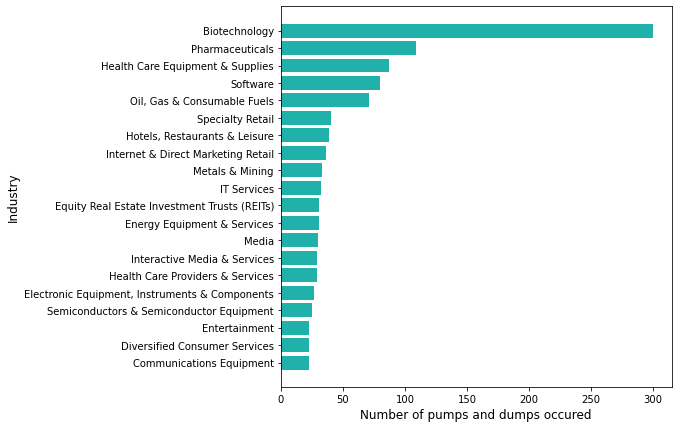

In [180]:
industries, ind_counts = np.unique(industries_df.industry.values, return_counts=True)
industries_arr = np.vstack((industries, ind_counts))
industries_arr2 = np.vstack((industries_arr[0,:][industries_arr[1,:]>=20], industries_arr[1,:][industries_arr[1,:]>=20]))

industries_df2=pd.DataFrame(industries_arr2.T, columns = ["industry", "number"]).sort_values(by='number')
plt.figure(figsize=(7,7))
plt.barh(industries_df2.industry.values, industries_df2.number.values, color ='lightseagreen')
plt.xlabel('Number of pumps and dumps occured', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.show()

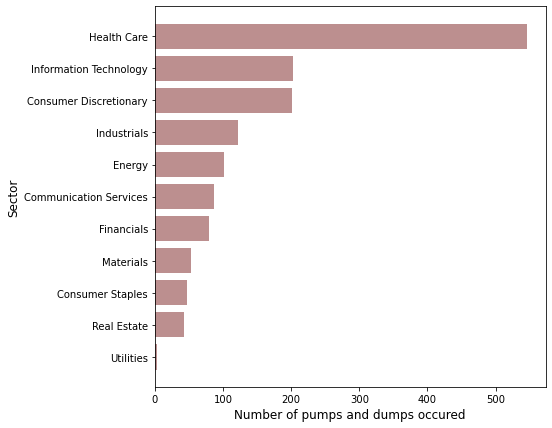

In [184]:
sectors, sec_counts = np.unique(industries_df.Sector.values, return_counts=True)
sectors_arr = np.vstack((sectors, sec_counts))
sectors_df2 = pd.DataFrame(sectors_arr.T, columns = ["sector", "number"]).sort_values(by='number')

plt.figure(figsize=(7,7))
plt.barh(sectors_df2.sector.values, sectors_df2.number.values, color ='rosybrown')
plt.xlabel('Number of pumps and dumps occured', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.show()

In [256]:
def plot_loghist(x, bins, color, xlabel, ylabel, xline):
    plt.figure(figsize=(7,7))
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, log=True, color=color)
    plt.xscale('log')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.axvline(xline, lw=1)
    plt.show()

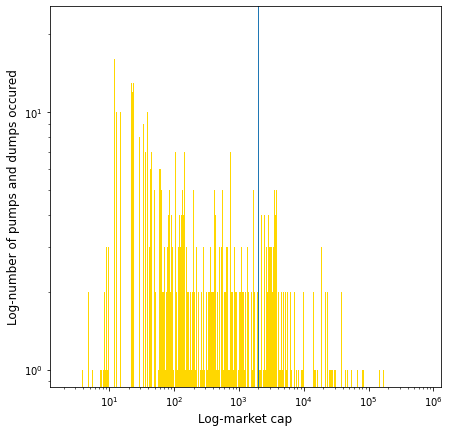

In [245]:
plot_loghist(industries_df['Market cap, mln'].values, 1000, 'gold', , 'Log-market cap', 'Log-number of pumps and dumps occured', 2000)

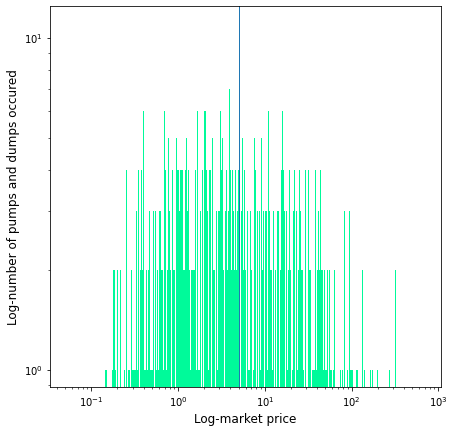

In [257]:
plot_loghist(industries_df['last_price'].values, 1000, 'mediumspringgreen', 'Log-market price', 'Log-number of pumps and dumps occured', 5)

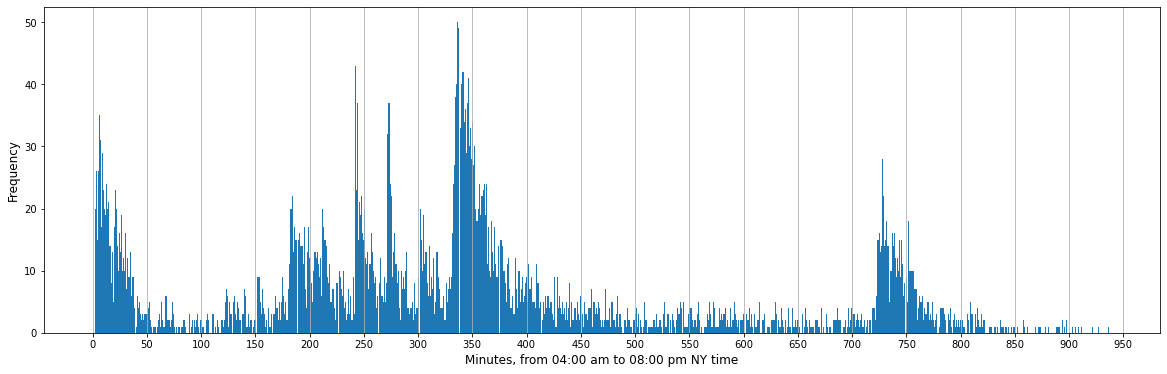

In [9]:
peak_idx_tot = np.array(tot_joined_list_)[:,3].astype(int)
fig = plt.figure(figsize =(20,6))
plt.xticks(np.arange(0, 960, 50))
hist, bins, _ = plt.hist(peak_idx_tot, bins=960)
plt.grid(axis='x')
plt.xlabel('Minutes, from 04:00 am to 08:00 pm NY time', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

If we remove the frequency<4, then the clusters in the figure above will be seeen more precisely:

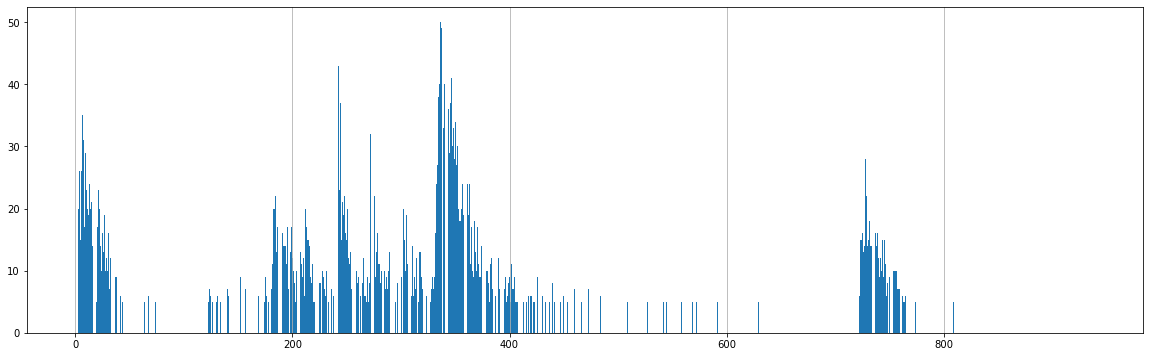

In [10]:
hists_ = []
for i in hist:
    if i>4:
        hist_ = i
    else:
        hist_ = 0
    hists_.append(hist_)
    
peaks_ind_ = np.stack((np.array(hists_), bins[:-1]), 1)
fig = plt.figure(figsize =(20,6))
bincenters = (np.array(bins)[1:] + bins[:-1])/2
plt.bar(bincenters,  hists_)
#plt.xticks(np.arange(0, 960, 10), rotation='vertical')
plt.grid(axis='x')
plt.show()

In [36]:
tot_joined_list_df = pd.DataFrame(tot_joined_list_, columns = ['ticker', 'day', 'return', 'peak_idx', 'dur', 'number_of_prints'])
cols = ['peak_idx', 'dur', 'number_of_prints']
tot_joined_list_df[cols] = tot_joined_list_df[cols].astype(int)
tot_joined_list_df['return'] = tot_joined_list_df['return'].astype(float)
tot_joined_list_df['day'] = pd.to_datetime(tot_joined_list_df['day'])
#tot_joined_list_df.sort_values(by=['dur','peak_idx'], inplace = True)
tot_joined_list_df.sort_values(by=['day'], inplace = True)
tot_joined_list_df

,ticker,day,return,peak_idx,dur,number_of_prints
4452,NBY,2019-09-03,0.2890,363,29,376
1004,SENS,2019-09-03,0.1396,731,11,432
20,CLSD,2019-09-04,0.2640,212,2,529
544,GEVO,2019-09-04,0.1423,306,6,390
3468,TOPS,2019-09-04,0.1359,187,24,497
...,...,...,...,...,...,...
3883,WKSP,2021-08-06,0.2237,437,26,449
5086,TAOP,2021-08-06,0.1571,254,34,465
1438,ANY,2021-08-06,0.2457,14,14,938
478,KXIN,2021-08-06,0.2914,190,10,779


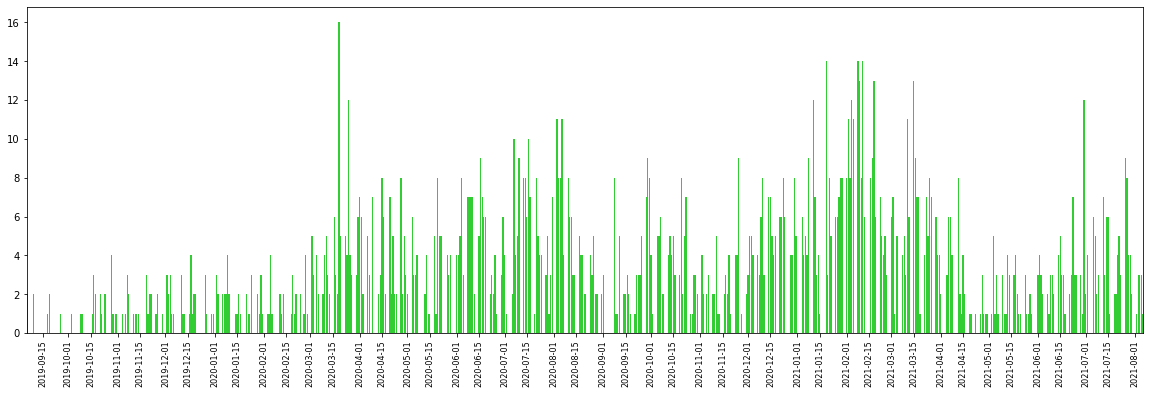

In [94]:
obs_counts_daily = tot_joined_list_df[tot_joined_list_df['return']>=0.3].groupby(by=tot_joined_list_df['day'].dt.date).count()['return']
fig, ax = plt.subplots(figsize =(20,6))
ax.bar(obs_counts_daily.index,  obs_counts_daily.values, color='limegreen')
plt.xticks(obs_counts_daily.index, fontsize=8, rotation='vertical')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1, 15]))
ax.set_xlim(obs_counts_daily.index[0], obs_counts_daily.index[-1])
plt.show()

<ipython-input-93-5e03ff07c7f2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


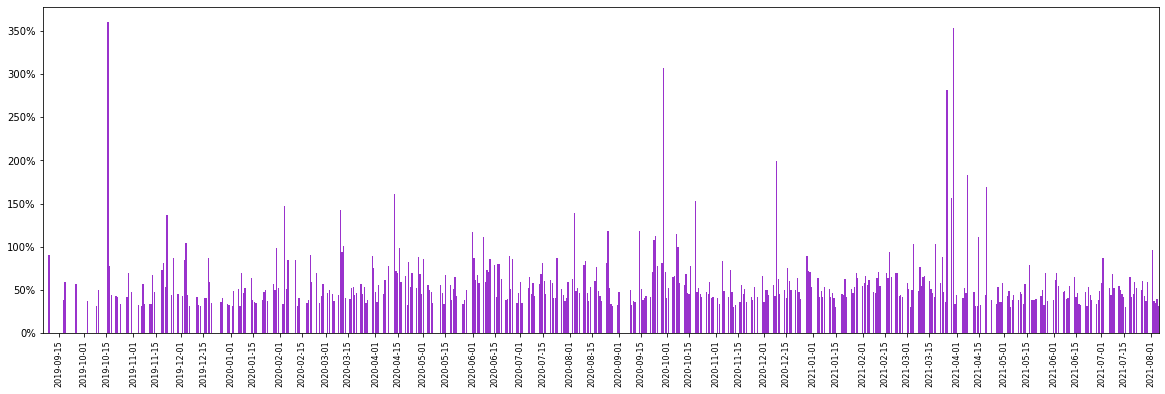

In [93]:
import matplotlib.ticker as mtick

obs_mean_daily = tot_joined_list_df[tot_joined_list_df['return']>=0.3].groupby(by=tot_joined_list_df['day'].dt.date).mean()['return']
fig, ax = plt.subplots(figsize =(20,6))
ax.bar(obs_mean_daily.index,  obs_mean_daily.values, color='darkorchid')
plt.xticks(obs_mean_daily.index, fontsize=8, rotation='vertical')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1, 15]))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_xlim(obs_mean_daily.index[0], obs_mean_daily.index[-1])
plt.show()

As we can see the distribution of pumps through the trading hours, we decided to divide the 5277 samples to 6 groups of trading hours, and then apply a hierarchical clustering using the DTW distance in each of this trading groups:

In [37]:
idx_df = tot_joined_list_df['peak_idx']
cluster1_df = tot_joined_list_df[idx_df<=120]
cluster2_df = tot_joined_list_df[(idx_df>120) & (idx_df<=240)]
cluster3_df = tot_joined_list_df[(idx_df>240) & (idx_df<=320)]
cluster4_df = tot_joined_list_df[(idx_df>320) & (idx_df<=420)]
cluster5_df = tot_joined_list_df[(idx_df>420) & (idx_df<=720)]
cluster6_df = tot_joined_list_df[(idx_df>720) & (idx_df<=960)]

cluster1 = cluster1_df.to_numpy()
cluster2 = cluster2_df.to_numpy()
cluster3 = cluster3_df.to_numpy()
cluster4 = cluster4_df.to_numpy()
cluster5 = cluster5_df.to_numpy()
cluster6 = cluster6_df.to_numpy()
clusters_list = [cluster1, cluster2, cluster3, cluster4, cluster5, cluster6]

Let's create a 3-days 1min times series feather files for each ticker in a list, for further calculations:

In [45]:
def concat_1min_dumps(ticker_name, day):
    parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/agg_tickers_1m_feather'
    file = os.path.join(parent_dir, ticker_name + '.feather')
    df = pd.read_feather(file)
    df.dropna(axis=0, how='all', inplace=True)
    df_grouped = df.groupby(df['date']).count()
    locs = df_grouped.index.get_loc(pd.to_datetime(day))
    prev_day = df_grouped.index[locs-1].date()
    next_day = df_grouped.index[locs+1].date()
    
    days = [str(prev_day), day, str(next_day)]
    df['datetime'] = pd.to_datetime(df.date.astype(str) + ' ' + df.time.astype(str))
    
    concat_dfs = pd.DataFrame()
    for day_k in days:
        df1 = df[df['date']==day_k]
        df1.set_index('datetime', inplace=True)
        
        start_time = pd.to_datetime(day_k + ' ' + "04:01")
        end_time = pd.to_datetime(day_k + ' ' + "20:00")
        index=pd.date_range(start_time, end_time, freq="1min")
        columns = ['A']
        data = np.array([np.arange(960)]).T
        df2 = pd.DataFrame(data, index=index, columns=columns)
        concat_df = pd.concat([df2, df1], axis=1)
        concat_dfs = concat_dfs.append(concat_df)
    return concat_dfs

In [101]:
parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/dumps_feather'
for i in tqdm(range(len(tot_joined_list_))):
    ticker_name = tot_joined_list_[i][0]
    day = tot_joined_list_[i][1]
    concat_df = concat_1min_dumps(ticker_name, day)
    concat_df.reset_index().to_feather(os.path.join(parent_dir, ticker_name + ' ' + day + '.feather'))

100%|████████████████████████████████████████████████████████████████████████████| 5277/5277 [1:17:55<00:00,  1.13it/s]


Let's extract the slice with 60min before the peak, and 120min after the peak:  
*  The max duration foк еру sharp pump is 35min, but we use 60min in order to get the min previous value.
*  We also get 120min after the peak, this is the max time to trade one ticket, if the strategy doesn't work, we quit by the stop-loss order.  

For example:  

['DPW', '2020-09-04', '0.2081', '152', '2', '761']


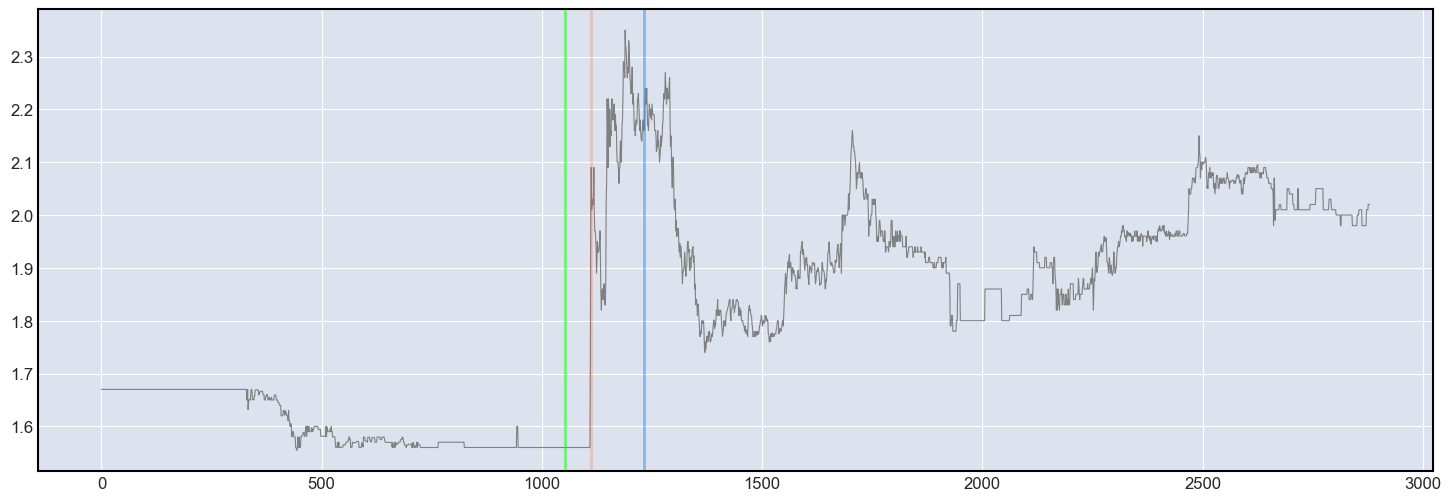

In [74]:
print(tot_joined_list_[0])
concat_df0 = concat_1min_dumps('DPW', '2020-09-04')
bound1 = int('152') + 960 - 60
bound2 = int('152') + 960 + 120
open_price = concat_df0.open.fillna(method='ffill').fillna(method='bfill').to_numpy()
plt.figure(figsize=(18,6))
plt.plot(open_price, c='grey', lw=0.8)
plt.axvline(bound1, c='lime', alpha=0.5)
plt.axvline(bound2, c='dodgerblue', alpha=0.5)
plt.axvline(int('152')+960, c='orangered', alpha=0.2)
plt.show()

and print all of them in one folder:

In [53]:
def plot_concat_1min(ticker_name, day, ret, peak_idx, dur):

    concat_df_ = concat_1min_dumps(ticker_name, day)
    
    bound1 = int(peak_idx) + 960 - 60
    bound2 = int(peak_idx) + 960 + 120
    concat_df = concat_df_.iloc[bound1:bound2,:]

    xlim = (concat_df.index[0], concat_df.index[-1])

    pictures_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_different_dumps_slices'
    file = os.path.join(pictures_dir, ticker_name + ' ' + day + '.png')

    mpf.plot(concat_df.iloc[:,3:], panel_ratios=(3, 1), figsize =(10,8), type='candle', volume=True, \
                 warn_too_much_data=1000, title=ticker_name + ' ' + day + ' ' + ret + ' ' + peak_idx + ' ' + dur, \
                 tight_layout=True, scale_padding={'left': 1, 'top': 4, 'right': 1, 'bottom': 1}, \
                 scale_width_adjustment=dict(candle=1.0),show_nontrading=False, xlim=xlim, \
                 xrotation=0, datetime_format='%H:%M',volume_exponent=6, savefig=file)

In [ ]:
the_list = tot_joined_list_
for i in tqdm(range(len(you_list))):
    ticker_name = the_list[i][0]
    day = the_list[i][1]
    ret = the_list[i][2]
    peak_idx = the_list[i][3]
    dur = the_list[i][4]
    plot_concat_1min(ticker_name, day, ret, peak_idx, dur)

it will look like that:

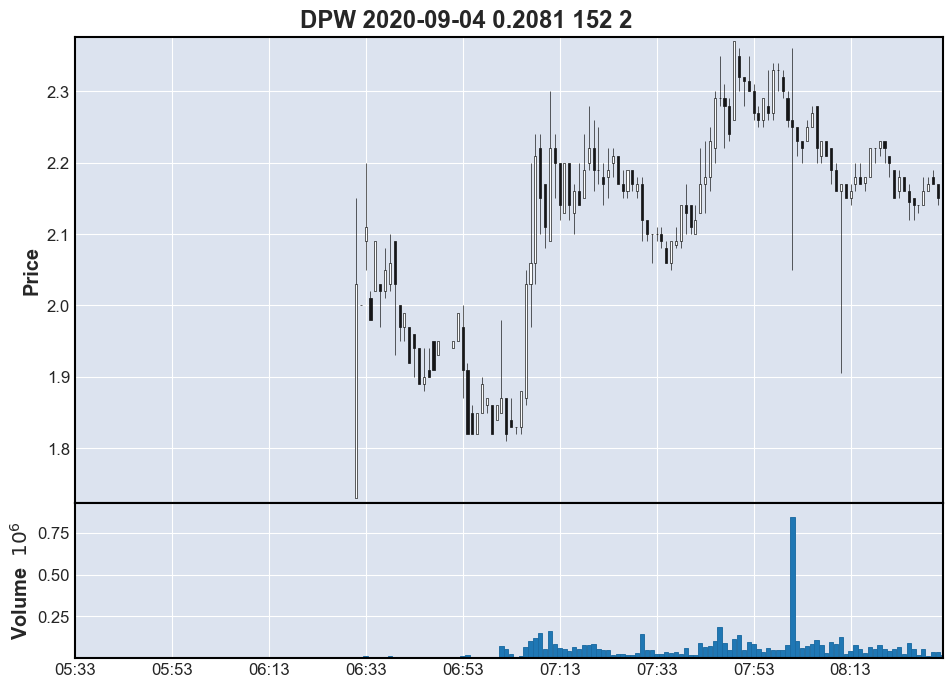

In [68]:
pictures_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_different_dumps_slices'
file = os.path.join(pictures_dir, 'DPW' + ' ' + '2020-09-04' + '.png')
from IPython.display import Image
Image(file, width=400)

Now for each cluster in the list we use this slicing, scale each time series and store the dataset:

In [110]:
for number, cluster in enumerate(clusters_list):
    tss_op = []
    tss_vol = []
    for i in tqdm(range(len(cluster))):
        ticker_name = cluster[i][0]
        day = cluster[i][1]
        peak_idx = cluster[i][3]

        feather_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/dumps_feather'
        concat_df = pd.read_feather(os.path.join(feather_dir, ticker_name + ' ' + day + '.feather'))
        concat_df.set_index('index', inplace=True)
        bound1 = int(peak_idx) + 960 - 60
        bound2 = int(peak_idx) + 960 + 120
        open_price = concat_df.open.fillna(method='ffill').fillna(method='bfill').to_numpy()[bound1:bound2]
        volume = concat_df.volume.fillna(0).to_numpy()[bound1:bound2]

        ts_scaler1 = TimeSeriesScalerMinMax()
        ts_scaler2 = TimeSeriesScalerMinMax()

        ts_price = ts_scaler1.fit_transform(open_price.reshape(1, open_price.shape[0])).ravel()
        ts_vol = ts_scaler2.fit_transform(volume.reshape(1, volume.shape[0])).ravel()

        tss_op.append(ts_price)
        tss_vol.append(ts_vol)
        
    parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters20' + '/'+ str(number)
    file_op = os.path.join(parent_dir, 'tss_op' + str(number) + '.npy')
    file_vol = os.path.join(parent_dir, 'tss_vol' + str(number) + '.npy')
    np.save(file_op, tss_op)
    np.save(file_vol, tss_vol)

100%|███████████████████████████████████████████████████████████████████████████████| 658/658 [00:01<00:00, 334.44it/s]


Now, let's apply the DTW distance calculations:

In [353]:
for number in range(len(clusters_list)):
 
    parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number)
    
    tss_op = np.load(os.path.join(parent_dir, 'tss_op' + str(number) + '.npy'))
    #tss_vol = np.load(os.path.join(parent_dir, 'tss_vol' + str(number) + '.npy'))
    
    file_op = os.path.join(parent_dir, 'dist_dtw_op' + str(number) + '.npy')
    #file_vol = os.path.join(parent_dir, 'dist_dtw_vol' + str(number) + '.npy')
    #file_lm = os.path.join(parent_dir, 'linkage_matrix_tot' + str(number) + '.npy')
    
    dist_matrix_op = dtw.distance_matrix_fast(tss_op, window=5, compact=True)
    dist_dtw_op = squareform(dist_matrix_op)
    np.save(file_op, dist_dtw_op)
    
    #dist_matrix_vol = dtw.distance_matrix_fast(tss_vol, window=None, compact=True)
    #dist_dtw_vol = squareform(dist_matrix_vol)
    #np.save(file_vol, dist_dtw_vol)
    
    #dist_dtw_tot = dist_dtw_op + dist_dtw_vol
    #simplefilter("ignore", ClusterWarning)
    #linkage_matrix_tot = ward(dist_dtw_tot)
    #np.save(file_lm, linkage_matrix_tot)

the linkage matrix for each group:

In [119]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram, ClusterWarning, fcluster
from collections import defaultdict

import shutil, os
from warnings import simplefilter

for number in range(len(clusters_list)):
    parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number)
    file_lm = os.path.join(parent_dir, 'linkage_matrix_op' + str(number) + '.npy')    
    file_op = os.path.join(parent_dir, 'dist_dtw_op' + str(number) + '.npy')
    dist_dtw_op = np.load(file_op)
    simplefilter("ignore", ClusterWarning)
    linkage_matrix_op = ward(dist_dtw_op)
    np.save(file_lm, linkage_matrix_op)

Now, using the clustering we will copy all printed figures from one folder with respect to each group and cluster:

In [158]:
for number in range(len(clusters_list)):
    parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number)
    file_lm = os.path.join(parent_dir, 'linkage_matrix_op' + str(number) + '.npy')
    linkage_matrix = np.load(file_lm)
    cluster_labels = fcluster(linkage_matrix, 150, criterion='distance')
    unq = np.unique(cluster_labels, return_counts=True)
    
    for item in unq[0].tolist():    
        path = os.path.join(parent_dir, str(item))
        os.makedirs(path)
    new_list_arr = np.array(clusters_list[number])[:,:2]
    cluster_labels = cluster_labels.reshape(len(cluster_labels),1)
    new_arr = np.hstack((new_list_arr, cluster_labels))
    copy_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_different_dumps_slices'
    #copy_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_different_dumps'

    for item in new_arr:
        ticker_name = item[0]
        day = item[1]
        cluster = item[2]
        file = os.path.join(copy_dir, ticker_name + ' ' + day + '.png')
        shutil.copy(file, parent_dir + '/' + str(cluster))

finally, let's see the distribution of clusters in each goup and if we can find an elbow in each of them:

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 91, 184, 100,  39,  33, 167,  93,  10,  36], dtype=int64))


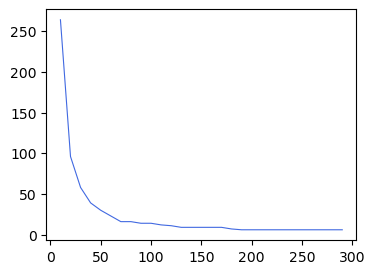

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 68, 171,   5,  74, 115, 190,  93,  81,  24], dtype=int64))


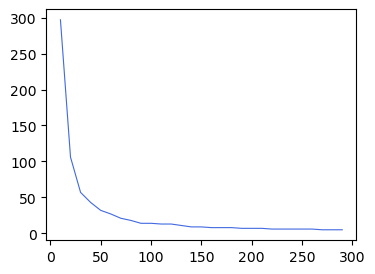

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32), array([ 71,  89,   7,  57,  34,  21,  33,  89, 109, 174,  33, 201],
      dtype=int64))


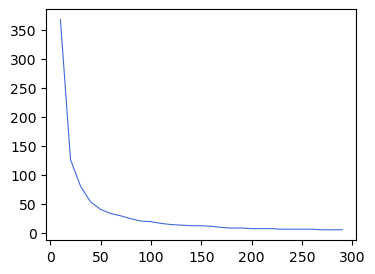

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32), array([ 48, 126,  41,  92, 144,  39,  10,  19,  92,   8,  75, 217, 106,
        60,  19,  41, 111,  53,  64, 109], dtype=int64))


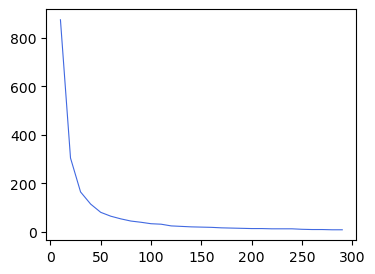

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([176,  62, 117,   2,  61,  26, 100, 109], dtype=int64))


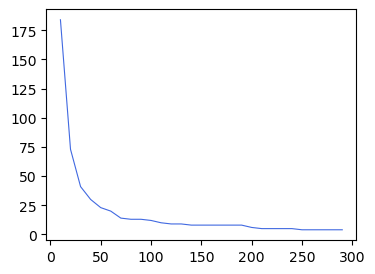

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32), array([ 43,  75, 125,  88, 122,  68, 137], dtype=int64))


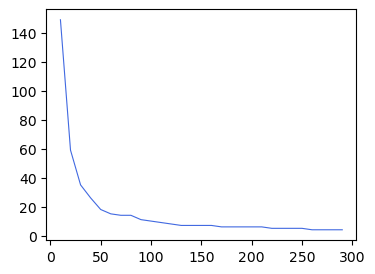

In [101]:
plt.style.use('default')
n=150
rng=np.arange(10, 300, 10)
for i, cluster in enumerate(clusters_list):
    linkage_matrix = np.load('C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2/' + str(i) + '/linkage_matrix_op' + str(i) + '.npy')
    cluster_labels = fcluster(linkage_matrix, n, criterion='distance')
    unq = np.unique(cluster_labels, return_counts=True)
    print(unq)
    clust_size=[]
    for k in rng:
        cluster_labels = fcluster(linkage_matrix, k, criterion='distance')
        unq = np.unique(cluster_labels, return_counts=True)
        clust_size.append(unq[0].size)
    plt.figure(figsize=(4,3))
    plt.plot(rng, clust_size, c='royalblue', lw=0.8)
    plt.show()

In [10]:
len(tot_joined_list)

7

### 'up' and 'double_down' groups

In [19]:
sub_clusters =['up', 'double_down']
imgs_in_cl = []
for cluster in range(6):
    imgs_in_sub_cl = []
    for sub_cluster in sub_clusters:
        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2/' + str(cluster) + '/' + sub_cluster
        imgs = glob.glob(parent_dir + '/*')
        all_imgs = []
        for img in imgs:
            name_date = img.split("\\")[1].split(".")[0].split(" ")
            all_imgs.append(name_date)
        imgs_in_sub_cl.append(all_imgs)
    imgs_in_cl.append(imgs_in_sub_cl)

In [31]:
for img_in_cl in imgs_in_cl:
    print(len(img_in_cl[0]), len(img_in_cl[1]))

120 120
128 134
186 195
384 356
160 91
52 66


In [52]:
def concat_1min(ticker_name, day, peak_idx):
    feather_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/dumps_feather'
    concat_df_ = pd.read_feather(os.path.join(feather_dir, ticker_name + ' ' + day + '.feather'))
    concat_df_.set_index('index', inplace=True)
    bound1 = int(peak_idx) + 960 - 60
    bound2 = int(peak_idx) + 960 + 120
    concat_df = concat_df_.iloc[bound1:bound2,:]

    parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_dumps_slices_180'
    file = os.path.join(parent_dir, ticker_name + ' ' + day + '.feather')
    concat_df.reset_index().to_feather(file)

In [53]:
the_list = tot_joined_list_
for i in tqdm(range(len(the_list))):
    ticker_name = the_list[i][0]
    day = the_list[i][1]
    peak_idx = the_list[i][3]
    concat_1min(ticker_name, day, peak_idx)

100%|█████████████████████████████████████████████████████████████████████████████| 5277/5277 [00:17<00:00, 301.94it/s]


In [64]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram, ClusterWarning, fcluster
from collections import defaultdict

import shutil, os
from warnings import simplefilter

In [ ]:
C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2/0/up
C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2/0/double_down

In [65]:
sub_clusters =['up', 'double_down']

for number, cluster in enumerate(imgs_in_cl):
    for n, sub_cluster in enumerate(cluster):
    
        tss_op = []
        tss_vol = []
        for i in tqdm(range(len(sub_cluster))):
            ticker_name = sub_cluster[i][0]
            day = sub_cluster[i][1]
            
            slices_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_dumps_slices_180'
            concat_df = pd.read_feather(os.path.join(slices_dir, ticker_name + ' ' + day + '.feather'))
            concat_df.set_index('index', inplace=True)

            open_price = concat_df.open.fillna(method='ffill').fillna(method='bfill').to_numpy()
            volume = concat_df.volume.fillna(0).to_numpy()

            ts_scaler1 = TimeSeriesScalerMinMax()
            ts_scaler2 = TimeSeriesScalerMinMax()

            ts_price = ts_scaler1.fit_transform(open_price.reshape(1, open_price.shape[0])).ravel()
            ts_vol = ts_scaler2.fit_transform(volume.reshape(1, volume.shape[0])).ravel()

            tss_op.append(ts_price)
            tss_vol.append(ts_vol)
            
        dist_matrix_op = dtw.distance_matrix_fast(tss_op, window=5, compact=True)
        dist_matrix_vol = dtw.distance_matrix_fast(tss_vol, window=5, compact=True)
        
        dist_dtw_op = squareform(dist_matrix_op)
        dist_dtw_vol = squareform(dist_matrix_vol)
        
        linkage_matrix_op = ward(dist_dtw_op)
        linkage_matrix_vol = ward(dist_dtw_vol)

        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number) + '/'+ sub_clusters[n]
        file_op = os.path.join(parent_dir, 'linkage_matrix_op' + '.npy')
        file_vol = os.path.join(parent_dir, 'linkage_matrix_vol' + '.npy')
        np.save(file_op, linkage_matrix_op)
        np.save(file_vol, linkage_matrix_vol)

100%|███████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 503.71it/s]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
100%|███████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 503.95it/s]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
100%|███████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 489.58it/s]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.clust

In [62]:
for number, cluster in enumerate(imgs_in_cl):
    for n, sub_cluster in enumerate(cluster):
        print(number, n, len(sub_cluster))

0 0 120
0 1 120
1 0 128
1 1 134
2 0 186
2 1 195
3 0 384
3 1 356
4 0 160
4 1 91
5 0 52
5 1 66


In [88]:
k = [[50, 25], [50, 50], [50, 50], [70, 70], [35, 20], [20, 20]]
for number, cluster in enumerate(imgs_in_cl):
    for n, sub_cluster in enumerate(cluster):
        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number) + '/'+ sub_clusters[n]
        file_op = os.path.join(parent_dir, 'linkage_matrix_op' + '.npy')
        linkage_matrix = np.load(file_op)
        cluster_labels = fcluster(linkage_matrix, k[number][n], criterion='distance')
        unq = np.unique(cluster_labels, return_counts=True)
        print(unq)

(array([1, 2, 3, 4], dtype=int32), array([27, 19, 14, 60], dtype=int64))
(array([1, 2, 3, 4, 5], dtype=int32), array([ 4, 23, 18, 30, 45], dtype=int64))
(array([1, 2, 3, 4], dtype=int32), array([31, 34, 34, 29], dtype=int64))
(array([1, 2, 3, 4], dtype=int32), array([10, 38, 31, 55], dtype=int64))
(array([1, 2, 3, 4, 5], dtype=int32), array([24, 49,  8, 45, 60], dtype=int64))
(array([1, 2, 3, 4, 5, 6], dtype=int32), array([21, 19, 77, 21, 18, 39], dtype=int64))
(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([ 14,  46,  12,  43,  67,  51,  37, 114], dtype=int64))
(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([25,  8, 42, 71, 23, 82, 58, 47], dtype=int64))
(array([1, 2, 3, 4, 5, 6], dtype=int32), array([28, 62, 41,  8,  4, 17], dtype=int64))
(array([1, 2, 3, 4, 5, 6], dtype=int32), array([18,  2,  6, 10, 23, 32], dtype=int64))
(array([1, 2, 3], dtype=int32), array([10, 25, 17], dtype=int64))
(array([1, 2, 3], dtype=int32), array([34, 31,  1], dtype=int64))


In [91]:
k = [[50, 25], [50, 50], [50, 50], [70, 70], [35, 20], [20, 20]]
for number, cluster in enumerate(imgs_in_cl):
    for n, sub_cluster in enumerate(cluster):
        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number) + '/'+ sub_clusters[n]
        file_op = os.path.join(parent_dir, 'linkage_matrix_op' + '.npy')
        linkage_matrix = np.load(file_op)
        cluster_labels = fcluster(linkage_matrix, k[number][n], criterion='distance')
        unq = np.unique(cluster_labels, return_counts=True)
        
        for item in unq[0].tolist():    
            path = os.path.join(parent_dir, str(item))
            os.makedirs(path)
            
        new_list_arr = np.array(sub_cluster)
        cluster_labels = cluster_labels.reshape(len(cluster_labels),1)
        new_arr = np.hstack((new_list_arr, cluster_labels))
        copy_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_different_dumps_slices'

        for item in new_arr:
            ticker_name = item[0]
            day = item[1]
            cluster = item[2]
            file = os.path.join(copy_dir, ticker_name + ' ' + day + '.png')
            shutil.copy(file, parent_dir + '/' + str(cluster))

### 'middle_smooth', 'middle_sharp' groups

In [92]:
sub_clusters =['middle_smooth', 'middle_sharp']
imgs_in_cl = []
for cluster in range(6):
    imgs_in_sub_cl = []
    for sub_cluster in sub_clusters:
        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2/' + str(cluster) + '/' + sub_cluster
        imgs = glob.glob(parent_dir + '/*')
        all_imgs = []
        for img in imgs:
            name_date = img.split("\\")[1].split(".")[0].split(" ")
            all_imgs.append(name_date)
        imgs_in_sub_cl.append(all_imgs)
    imgs_in_cl.append(imgs_in_sub_cl)

In [94]:
sub_clusters =['middle_smooth', 'middle_sharp']

for number, cluster in enumerate(imgs_in_cl):
    for n, sub_cluster in enumerate(cluster):
    
        tss_op = []
        tss_vol = []
        for i in tqdm(range(len(sub_cluster))):
            ticker_name = sub_cluster[i][0]
            day = sub_cluster[i][1]
            
            slices_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_dumps_slices_180'
            concat_df = pd.read_feather(os.path.join(slices_dir, ticker_name + ' ' + day + '.feather'))
            concat_df.set_index('index', inplace=True)

            open_price = concat_df.open.fillna(method='ffill').fillna(method='bfill').to_numpy()
            volume = concat_df.volume.fillna(0).to_numpy()

            ts_scaler1 = TimeSeriesScalerMinMax()
            ts_scaler2 = TimeSeriesScalerMinMax()

            ts_price = ts_scaler1.fit_transform(open_price.reshape(1, open_price.shape[0])).ravel()
            ts_vol = ts_scaler2.fit_transform(volume.reshape(1, volume.shape[0])).ravel()

            tss_op.append(ts_price)
            tss_vol.append(ts_vol)
            
        dist_matrix_op = dtw.distance_matrix_fast(tss_op, window=5, compact=True)
        dist_matrix_vol = dtw.distance_matrix_fast(tss_vol, window=5, compact=True)
        
        dist_dtw_op = squareform(dist_matrix_op)
        dist_dtw_vol = squareform(dist_matrix_vol)
        
        linkage_matrix_op = ward(dist_dtw_op)
        linkage_matrix_vol = ward(dist_dtw_vol)

        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number) + '/'+ sub_clusters[n]
        file_op = os.path.join(parent_dir, 'linkage_matrix_op' + '.npy')
        file_vol = os.path.join(parent_dir, 'linkage_matrix_vol' + '.npy')
        np.save(file_op, linkage_matrix_op)
        np.save(file_vol, linkage_matrix_vol)

100%|█████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 536.07it/s]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
100%|███████████████████████████████████████████████████████████████████████████████| 130/130 [00:00<00:00, 489.58it/s]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
100%|███████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 481.79it/s]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.clust

In [93]:
for img_in_cl in imgs_in_cl:
    print(len(img_in_cl[0]), len(img_in_cl[1]))

86 130
161 54
52 33
142 76
107 76
31 234


In [113]:
k = [[30, 30], [40, 15], [15, 10], [40, 20], [20, 20], [15, 40]]
for number, cluster in enumerate(imgs_in_cl):
    for n, sub_cluster in enumerate(cluster):
        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number) + '/'+ sub_clusters[n]
        file_op = os.path.join(parent_dir, 'linkage_matrix_op' + '.npy')
        linkage_matrix = np.load(file_op)
        cluster_labels = fcluster(linkage_matrix, k[number][n], criterion='distance')
        unq = np.unique(cluster_labels, return_counts=True)
        print(unq)

(array([1, 2, 3], dtype=int32), array([20, 29, 37], dtype=int64))
(array([1, 2, 3, 4], dtype=int32), array([13, 46, 16, 55], dtype=int64))
(array([1, 2, 3, 4], dtype=int32), array([31, 16, 35, 79], dtype=int64))
(array([1, 2, 3, 4], dtype=int32), array([14, 14, 25,  1], dtype=int64))
(array([1, 2, 3], dtype=int32), array([ 9, 18, 25], dtype=int64))
(array([1, 2, 3], dtype=int32), array([13, 19,  1], dtype=int64))
(array([1, 2, 3, 4], dtype=int32), array([17, 45, 60, 20], dtype=int64))
(array([1, 2], dtype=int32), array([45, 31], dtype=int64))
(array([1, 2, 3, 4, 5], dtype=int32), array([24,  5, 12, 45, 21], dtype=int64))
(array([1, 2, 3], dtype=int32), array([ 8, 27, 41], dtype=int64))
(array([1, 2], dtype=int32), array([26,  5], dtype=int64))
(array([1, 2, 3, 4, 5, 6, 7], dtype=int32), array([20, 28, 69, 42, 45,  2, 28], dtype=int64))


In [114]:
k = [[30, 30], [40, 15], [15, 10], [40, 20], [20, 20], [15, 40]]
for number, cluster in enumerate(imgs_in_cl):
    for n, sub_cluster in enumerate(cluster):
        parent_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/six_clusters2' + '/'+ str(number) + '/'+ sub_clusters[n]
        file_op = os.path.join(parent_dir, 'linkage_matrix_op' + '.npy')
        linkage_matrix = np.load(file_op)
        cluster_labels = fcluster(linkage_matrix, k[number][n], criterion='distance')
        unq = np.unique(cluster_labels, return_counts=True)
        
        for item in unq[0].tolist():    
            path = os.path.join(parent_dir, str(item))
            os.makedirs(path)
            
        new_list_arr = np.array(sub_cluster)
        cluster_labels = cluster_labels.reshape(len(cluster_labels),1)
        new_arr = np.hstack((new_list_arr, cluster_labels))
        copy_dir = 'C:/Users/Kuanysh/Downloads/pump_and_dump/all_different_dumps_slices'

        for item in new_arr:
            ticker_name = item[0]
            day = item[1]
            cluster = item[2]
            file = os.path.join(copy_dir, ticker_name + ' ' + day + '.png')
            shutil.copy(file, parent_dir + '/' + str(cluster))

In [ ]:
'C:/Users/Kuanysh/Downloads/pump_and_dump/all_different_pumps_slices